This program is designed to pull data from a geographic region (Lat/Lon pre-defined) and display it. The first attempt is focused on Florida

In [1]:
#import resources

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import cartopy.feature as cfeature
import cartopy.mpl as cmpl
from pyproj import Proj

In [6]:
#import netCDF file
nc_file = nc.Dataset('/localdata/cases/20180519/GLM_data/GLM-00-00_20180520_030000_60_1src_056urad-dx_flash_extent.nc','r')
variables = nc_file.variables.keys()
print (variables)

odict_keys(['goes_imager_projection', 'x', 'y', 'time', 'flash_extent_density'])


In [7]:
GLM_var = nc_file.variables['flash_extent_density'][:,:]

In [10]:
nc_file.variables['goes_imager_projection']

# Satellite height
sat_h = nc_file.variables['goes_imager_projection'].perspective_point_height
print (sat_h)

# Satellite longitude
sat_lon = nc_file.variables['goes_imager_projection'].longitude_of_projection_origin
print (sat_lon)

# Satellite sweep
sat_sweep = nc_file.variables['goes_imager_projection'].sweep_angle_axis
print (sat_sweep)

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = nc_file.variables['x'][:] * sat_h
Y = nc_file.variables['y'][:] * sat_h
print (X.shape)
print (Y.shape)

35786023.0
-75.0
x
(3249,)
(1300,)


In [14]:
print (sat_h,sat_lon,sat_sweep)

35786023.0 -75.0 x


In [11]:
# map object with pyproj
p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)

In [12]:
XX, YY = np.meshgrid(X, Y)
lons, lats = p(XX, YY, inverse=True)

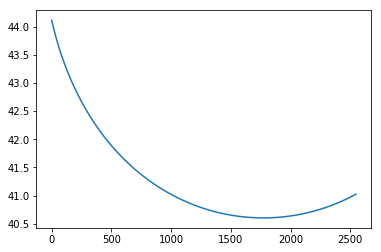

(1300, 3249)

In [82]:
plts=plt.plot(lats[800,700:])#,levels=np.arange(-140,-80))
plt.ymax=80
plt.ymin=20
plt.show()
#plt.colorbar()
limits = (lats > 35) & (lats < 50)
limits.shape

In [84]:
plt.contourf(lats,levels=np.arange(25,80))
plt.colorbar()

AttributeError: 'MaskedArray' object has no attribute 'limits'

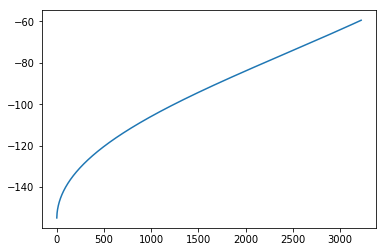

In [32]:
plt.plot(lons[0,25:])

In [15]:
print (lats)

[[1.00000000e+30 1.00000000e+30 1.00000000e+30 ... 2.21405233e+01
  2.21409032e+01 2.21412837e+01]
 [1.00000000e+30 1.00000000e+30 1.00000000e+30 ... 2.21611002e+01
  2.21614806e+01 2.21618615e+01]
 [1.00000000e+30 1.00000000e+30 1.00000000e+30 ... 2.21816844e+01
  2.21820653e+01 2.21824467e+01]
 ...
 [1.00000000e+30 1.00000000e+30 1.00000000e+30 ... 5.95838856e+01
  5.95888990e+01 5.95939259e+01]
 [1.00000000e+30 1.00000000e+30 1.00000000e+30 ... 5.96400203e+01
  5.96450654e+01 5.96501241e+01]
 [1.00000000e+30 1.00000000e+30 1.00000000e+30 ... 5.96963383e+01
  5.97014156e+01 5.97065065e+01]]


In [21]:
print (Y)

[2340686.  2342690.  2344694.2 ... 4939896.5 4941900.5 4943904.5]


In [30]:
np.where(lats[0,:]>100000000000)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])